# DCGAN Data Preparation

In [ ]:
#hide
IN_COLAB = 'google.colab' in str(get_ipython())
if IN_COLAB:
  !pip3 install -Uqq fastbook

     |████████████████████████████████| 727kB 11.7MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 194kB 56.9MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 1.0MB 52.9MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 92kB 12.8MB/s 
     |████████████████████████████████| 40kB 7.7MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 2.6MB 60.2MB/s 


In [ ]:
#hide
if IN_COLAB:
  from pathlib import Path
  from nbdev.imports import Config
  project_path = Path('/content/drive/My Drive/Colab Notebooks/github/dcgan')
  get_ipython().magic(f'cd {project_path}')
  get_ipython().magic(f'cd {Config().nbs_path}')

In [ ]:
# default_exp data

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
from fastai.vision.all import *

## Dataset ( MNIST )

In [ ]:
#slow
path = untar_data(URLs.MNIST)

In [ ]:
#slow
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [ ]:
#export
class InvisibleTensor(TensorBase):
    def show(self, ctx=None, **kwargs): return ctx

def generate_noise(fn, size=64): return cast(torch.randn(size).view(-1, 1, 1), InvisibleTensor)

In [ ]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock(cls=PILImageBW)),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   batch_tfms=Normalize.from_stats(mean=0.5, std=0.5)
                   )

In [ ]:
#cuda
dls = dblock.dataloaders(path, bs=4)

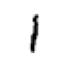

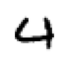

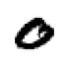

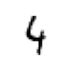

In [ ]:
#cuda
dls.show_batch()

In [ ]:
#export
def get_dls(path, bs=4, num_workers=2):
    """
    Given image path, load the images.
    Batch size is specified by `bs` (default=4).
    """
    dblock = DataBlock(blocks = (TransformBlock, ImageBlock(cls=PILImageBW)),
                       get_x = generate_noise,
                       get_items = get_image_files,
                       splitter = IndexSplitter([]),
                       batch_tfms=Normalize.from_stats(mean=0.5, std=0.5)
                   )

    dls = dblock.dataloaders(path, path=path, bs=bs, num_workers=num_workers)

    return dls

In [ ]:
#cuda
dls      = get_dls(path, bs=4)
noise, x = dls.one_batch()

test_eq(noise.shape, (4, 64, 1, 1))
test_eq(x.shape, (4, 1, 28, 28))

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_data.ipynb.
Converted index.ipynb.
